# Partie 1 – Préparation des données Pokémon

Dans ce notebook, on prépare et on explore les données du Pokédex et des combats. Cela est pour les utiliser plus tard dans un algorithme d'apprentissage automatique.


In [45]:
import pandas as pd

# Options d'affichage pour voir les tableaux
pd.set_option("display.max_columns", None)   # afficher toutes les colonnes
pd.set_option("future.no_silent_downcasting", True)


## 1. Découverte des données du Pokédex

On commence par charger le fichier `pokedex.csv` qui contient les caractéristiques
des Pokémon (types, points de vie, attaques, etc.).


In [46]:
pokedex_path = "datas/pokedex.csv"

nosPokemons = pd.read_csv(pokedex_path)

# Affichage des colonnes
print("Colonnes du Pokédex :")
print(nosPokemons.columns.values)

# Quelques infos générales
print("\nShape (nb lignes, nb colonnes) :", nosPokemons.shape)

# Aperçu des 10 premières lignes
nosPokemons.head(10)


Colonnes du Pokédex :
['NUMERO' 'NOM' 'TYPE_1' 'TYPE_2' 'POINTS_DE_VIE' 'NIVEAU_ATTAQUE'
 'NIVEAU_DEFENSE' 'NIVEAU_ATTAQUE_SPECIALE' 'NIVEAU_DEFENSE_SPECIALE'
 'VITESSE' 'NOMBRE_GENERATIONS' 'LEGENDAIRE']

Shape (nb lignes, nb colonnes) : (800, 12)


,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,NIVEAU_ATTAQUE,NIVEAU_DEFENSE,NIVEAU_ATTAQUE_SPECIALE,NIVEAU_DEFENSE_SPECIALE,VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,FAUX
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,FAUX
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,FAUX
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,FAUX
4,5,Salameche,Feu,NaN,39,52,43,60,50,65,1,FAUX
5,6,Reptincel,Feu,NaN,58,64,58,80,65,80,1,FAUX
6,7,Dracaufeu,Feu,Vol,78,84,78,109,85,100,1,FAUX
7,8,Mega Dracaufeu X,Feu,Dragon,78,130,111,130,85,100,1,FAUX
8,9,Mega Dracaufeu Y,Feu,Vol,78,104,78,159,115,100,1,FAUX
9,10,Carapuce,Eau,NaN,44,48,65,50,64,43,1,FAUX


### Signification des colonnes principales

- **NUMERO** : identifiant du Pokémon dans le Pokédex  
- **NOM** : nom du Pokémon  
- **TYPE_1** : type principal (Herbe, Feu, Eau, etc.)  
- **TYPE_2** : type secondaire (peut être vide si le Pokémon n’en a pas)  
- **POINTS_DE_VIE** : points de vie  
- **NIVEAU_ATTAQUE** : niveau d’attaque  
- **NIVEAU_DEFENSE** : niveau de défense  
- **NIVEAU_ATTAQUE_SPECIALE** : attaque spéciale  
- **NIVEAU_DEFENSE_SPECIALE** : défense spéciale  
- **VITESSE** : vitesse du Pokémon  
- **GENERATION** : génération à laquelle appartient le Pokémon  
- **LEGENDAIRE** : indique si le Pokémon est légendaire (VRAI / FAUX)


## 2. Types de variables (features)

On distingue deux grandes familles de variables :

- **Features de catégorisation** : servent à classer les Pokémon dans des groupes  
- **Features numériques** : valeurs chiffrées utilisées pour les calculs et les modèles

On crée des listes Python pour bien les séparer.


In [47]:
# Features de catégorisation
features_categorisation = ["TYPE_1", "TYPE_2", "LEGENDAIRE", "GENERATION"]

# Features numériques
features_numeriques = [
    "NUMERO",
    "POINTS_DE_VIE",
    "NIVEAU_ATTAQUE",
    "NIVEAU_DEFENSE",
    "NIVEAU_ATTAQUE_SPECIALE",
    "NIVEAU_DEFENSE_SPECIALE",
    "VITESSE",
]

print("Features de catégorisation :", features_categorisation)
print("Features numériques :", features_numeriques)


Features de catégorisation : ['TYPE_1', 'TYPE_2', 'LEGENDAIRE', 'GENERATION']
Features numériques : ['NUMERO', 'POINTS_DE_VIE', 'NIVEAU_ATTAQUE', 'NIVEAU_DEFENSE', 'NIVEAU_ATTAQUE_SPECIALE', 'NIVEAU_DEFENSE_SPECIALE', 'VITESSE']


## 3. Transformation de la feature `LEGENDAIRE`

La colonne `LEGENDAIRE` est booléenne dans l’idée (VRAI / FAUX) mais stockée
comme du texte. Pour les modèles de Machine Learning, c’est plus pratique de
l’avoir au format numérique :

- 1 → Pokémon légendaire  
- 0 → Pokémon non légendaire


In [48]:
# On travaille sur une copie pour ne pas modifier le DataFrame d'origine
nosPokemonsClean = nosPokemons.copy()

# Conversion de VRAI / FAUX en 1 / 0
nosPokemonsClean["LEGENDAIRE"] = (
    nosPokemonsClean["LEGENDAIRE"]
    .replace({"VRAI": 1, "FAUX": 0})
    .astype(int)
)

nosPokemonsClean[["NOM", "LEGENDAIRE"]].head(10)


,NOM,LEGENDAIRE
0,Bulbizarre,0
1,Herbizarre,0
2,Florizarre,0
3,Mega Florizarre,0
4,Salameche,0
5,Reptincel,0
6,Dracaufeu,0
7,Mega Dracaufeu X,0
8,Mega Dracaufeu Y,0
9,Carapuce,0


## 4. Données manquantes

On vérifie maintenant s'il manque des informations dans le Pokédex :
noms manquants, types manquants, etc.


In [49]:
# Informations générales (types et nombre de valeurs non nulles)
nosPokemonsClean.info()

# Nombre de valeurs manquantes par colonne
nosPokemonsClean.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NUMERO                   800 non-null    int64 
 1   NOM                      799 non-null    object
 2   TYPE_1                   800 non-null    object
 3   TYPE_2                   413 non-null    object
 4   POINTS_DE_VIE            800 non-null    int64 
 5   NIVEAU_ATTAQUE           800 non-null    int64 
 6   NIVEAU_DEFENSE           800 non-null    int64 
 7   NIVEAU_ATTAQUE_SPECIALE  800 non-null    int64 
 8   NIVEAU_DEFENSE_SPECIALE  800 non-null    int64 
 9   VITESSE                  800 non-null    int64 
 10  NOMBRE_GENERATIONS       800 non-null    int64 
 11  LEGENDAIRE               800 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 75.1+ KB


NUMERO                       0
NOM                          1
TYPE_1                       0
TYPE_2                     387
POINTS_DE_VIE                0
NIVEAU_ATTAQUE               0
NIVEAU_DEFENSE               0
NIVEAU_ATTAQUE_SPECIALE      0
NIVEAU_DEFENSE_SPECIALE      0
VITESSE                      0
NOMBRE_GENERATIONS           0
LEGENDAIRE                   0
dtype: int64

### 4.1 Traitement du nom manquant

Un Pokémon n’a pas de nom renseigné.  
On va retrouver la ligne correspondante, comprendre de quel Pokémon il s’agit,
puis remplir correctement son nom.


In [50]:
# Lignes où le nom est manquant
ligne_nom_manquant = nosPokemonsClean[nosPokemonsClean["NOM"].isna()]
ligne_nom_manquant


,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,NIVEAU_ATTAQUE,NIVEAU_DEFENSE,NIVEAU_ATTAQUE_SPECIALE,NIVEAU_DEFENSE_SPECIALE,VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
62,63,NaN,Combat,NaN,65,105,60,60,70,95,1,0


In [51]:
# Vérification de la ligne précédente et suivante
idx = ligne_nom_manquant.index[0]
print("Ligne précédente :")
print(nosPokemonsClean.loc[idx - 1, ["NUMERO", "NOM"]])

print("\nLigne suivante :")
print(nosPokemonsClean.loc[idx + 1, ["NUMERO", "NOM"]])


Ligne précédente :
NUMERO           62
NOM       Ferosinge
Name: 61, dtype: object

Ligne suivante :
NUMERO         64
NOM       Caninos
Name: 63, dtype: object


In [52]:
# Remplissage du nom manquant
nosPokemonsClean.loc[idx, "NOM"] = "Colossinge"

# Vérification
nosPokemonsClean.loc[idx, ["NUMERO", "NOM"]]


NUMERO            63
NOM       Colossinge
Name: 62, dtype: object

On vérifie maintenant que :

- il ne reste plus de nom manquant ;
- seuls les `TYPE_2` peuvent rester vides (Pokémon à un seul type).


In [53]:
nosPokemonsClean.isna().sum()


NUMERO                       0
NOM                          0
TYPE_1                       0
TYPE_2                     387
POINTS_DE_VIE                0
NIVEAU_ATTAQUE               0
NIVEAU_DEFENSE               0
NIVEAU_ATTAQUE_SPECIALE      0
NIVEAU_DEFENSE_SPECIALE      0
VITESSE                      0
NOMBRE_GENERATIONS           0
LEGENDAIRE                   0
dtype: int64

## 5. Analyse des données de combats

On va maintenant travailler sur le fichier `combats.csv` qui contient
les combats entre Pokémon :

- `Premier_Pokemon` : numéro du Pokémon utilisé en premier
- `Second_Pokemon` : numéro du Pokémon en second
- `Pokemon_Gagnant` : numéro du Pokémon gagnant


In [54]:
combats_path = "datas/combats.csv"

combats = pd.read_csv(combats_path)

print("Colonnes des combats :")
print(combats.columns.values)

print("\nShape (nb lignes, nb colonnes) :", combats.shape)

print("\nAperçu des 10 premières lignes :")
display(combats.head(10))

print("\nInfos sur le DataFrame combats :")
combats.info()


Colonnes des combats :
['Premier_Pokemon' 'Second_Pokemon' 'Pokemon_Gagnant']

Shape (nb lignes, nb colonnes) : (50000, 3)

Aperçu des 10 premières lignes :


,Premier_Pokemon,Second_Pokemon,Pokemon_Gagnant
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31



Infos sur le DataFrame combats :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Premier_Pokemon  50000 non-null  int64
 1   Second_Pokemon   50000 non-null  int64
 2   Pokemon_Gagnant  50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


## 6. Nombre de combats menés par Pokémon

Pour chaque Pokémon, on veut connaître :

- combien de fois il a été en **première position** ;
- combien de fois il a été en **seconde position** ;
- le **nombre total de combats** menés.


In [55]:
# Nombre de combats où le Pokémon est en première position
nbFoisPremierePosition = combats.groupby("Premier_Pokemon")["Pokemon_Gagnant"].count()

nbFoisPremierePosition.head()


Premier_Pokemon
1    70
2    55
3    68
4    62
5    50
Name: Pokemon_Gagnant, dtype: int64

In [56]:
# Nombre de combats où le Pokémon est en seconde position
nbFoisSecondePosition = combats.groupby("Second_Pokemon")["Pokemon_Gagnant"].count()

# Nombre total de combats (première + seconde position)
nombreTotalDeCombats = nbFoisPremierePosition.add(nbFoisSecondePosition, fill_value=0)

nombreTotalDeCombats.head()


Premier_Pokemon
1    133
2    121
3    132
4    125
5    112
Name: Pokemon_Gagnant, dtype: int64

## 7. Nombre de combats gagnés

On veut maintenant savoir combien de combats chaque Pokémon a gagnés.


In [57]:
# Nombre de victoires par Pokémon
nombreDeVictoires = combats.groupby("Pokemon_Gagnant")["Premier_Pokemon"].count()

nombreDeVictoires.head()


Pokemon_Gagnant
1    37
2    46
3    89
4    70
5    55
Name: Premier_Pokemon, dtype: int64

## 8. Agrégation des informations de combats

On construit un tableau qui, pour chaque numéro de Pokémon, contient :

- le nombre total de combats menés (`NBR_COMBATS`)
- le nombre de combats gagnés (`NBR_VICTOIRES`)
- le pourcentage de victoires (`POURCENTAGE_DE_VICTOIRES`)


In [58]:
# Construction du DataFrame d'agrégation
listeAAggreger = pd.DataFrame({
    "NBR_COMBATS": nombreTotalDeCombats,
    "NBR_VICTOIRES": nombreDeVictoires
})

# Pourcentage de victoires
listeAAggreger["POURCENTAGE_DE_VICTOIRES"] = (
    listeAAggreger["NBR_VICTOIRES"] / listeAAggreger["NBR_COMBATS"]
)

# On trie par numéro de Pokémon (index)
listeAAggreger = listeAAggreger.sort_index()

listeAAggreger.head()


,NBR_COMBATS,NBR_VICTOIRES,POURCENTAGE_DE_VICTOIRES
1,133,37.0,0.278195
2,121,46.0,0.380165
3,132,89.0,0.674242
4,125,70.0,0.560000
5,112,55.0,0.491071


## 9. Fusion avec le Pokédex (nouveauPokedex)

On fusionne maintenant les informations du Pokédex (`nosPokemonsClean`)
avec le tableau d'agrégation `listeAAggreger`, en utilisant `NUMERO`
comme clé de jointure.

Le résultat est un nouveau DataFrame qui contient, pour chaque Pokémon :

- ses caractéristiques (types, stats, légendaire ou non)
- ses statistiques de combats (nombre de combats, victoires, pourcentage)


In [59]:
nouveauPokedex = nosPokemonsClean.merge(
    listeAAggreger,
    left_on="NUMERO",
    right_index=True,
    how="left"
)

# Aperçu
nouveauPokedex.head()


,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,NIVEAU_ATTAQUE,NIVEAU_DEFENSE,NIVEAU_ATTAQUE_SPECIALE,NIVEAU_DEFENSE_SPECIALE,VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,NBR_COMBATS,NBR_VICTOIRES,POURCENTAGE_DE_VICTOIRES
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,133.0,37.0,0.278195
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,121.0,46.0,0.380165
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,132.0,89.0,0.674242
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,125.0,70.0,0.560000
4,5,Salameche,Feu,NaN,39,52,43,60,50,65,1,0,112.0,55.0,0.491071


In [60]:
# Quelques statistiques numériques sur les combats et victoires
nouveauPokedex[["NBR_COMBATS", "NBR_VICTOIRES", "POURCENTAGE_DE_VICTOIRES"]].describe()


,NBR_COMBATS,NBR_VICTOIRES,POURCENTAGE_DE_VICTOIRES
count,784.000000,783.000000,783.000000
mean,127.551020,63.856960,0.501538
std,11.393236,32.925941,0.254993
min,92.000000,3.000000,0.021739
25%,120.000000,36.000000,0.284228
50%,128.000000,62.000000,0.491071
75%,135.000000,91.000000,0.717644
max,164.000000,152.000000,0.984496


## Conclusion de la Partie 1

- Les données du Pokédex ont été nettoyées (correction d'un nom manquant,
  transformation de `LEGENDAIRE` en valeur numérique).
- Les données de combats ont été analysées pour calculer, pour chaque Pokémon :
  le nombre de combats menés, le nombre de victoires et le pourcentage de victoires.
- Un nouveau DataFrame `nouveauPokedex` regroupe toutes ces informations.

Ce DataFrame servira de base pour la Partie 2 et pour l'entraînement
des modèles de Machine Learning (Partie 3).


# Partie 2 – Analyse statistique et exploration des données

## 1. Statistiques descriptives

Nous commençons par afficher des statistiques descriptives sur les caractéristiques
numériques des Pokémon. Cela nous donne une idée des valeurs minimales, maximales,
moyennes et de la dispersion.


In [61]:
print(nouveauPokedex.describe())


         NUMERO  POINTS_DE_VIE  NIVEAU_ATTAQUE  NIVEAU_DEFENSE  \
count  800.0000     800.000000      800.000000      800.000000   
mean   400.5000      69.258750       79.001250       73.842500   
std    231.0844      25.534669       32.457366       31.183501   
min      1.0000       1.000000        5.000000        5.000000   
25%    200.7500      50.000000       55.000000       50.000000   
50%    400.5000      65.000000       75.000000       70.000000   
75%    600.2500      80.000000      100.000000       90.000000   
max    800.0000     255.000000      190.000000      230.000000   

       NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE     VITESSE  \
count               800.000000               800.000000  800.000000   
mean                 72.820000                71.902500   68.277500   
std                  32.722294                27.828916   29.060474   
min                  10.000000                20.000000    5.000000   
25%                  49.750000                50.0

## 2. Répartition des types de Pokémon

Nous analysons maintenant la répartition des Pokémon selon leur premier type (`TYPE_1`)
et leur deuxième type (`TYPE_2`). Les graphiques suivants montrent la fréquence
des types et séparent les Pokémon légendaires des autres.


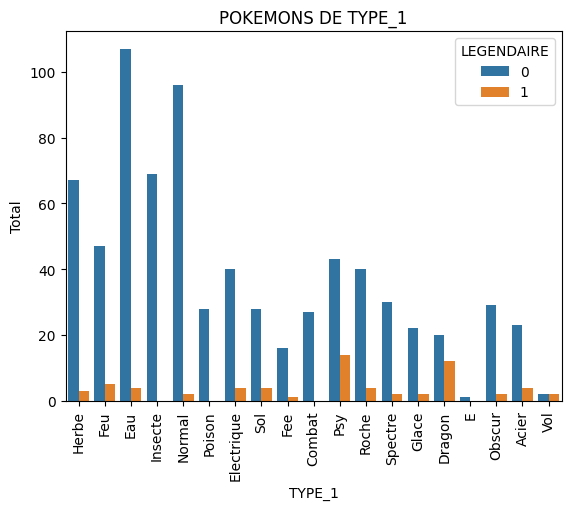

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

axe_x = sns.countplot(x="TYPE_1", hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel("TYPE_1")
plt.ylabel("Total")
plt.title("POKEMONS DE TYPE_1")
plt.show()


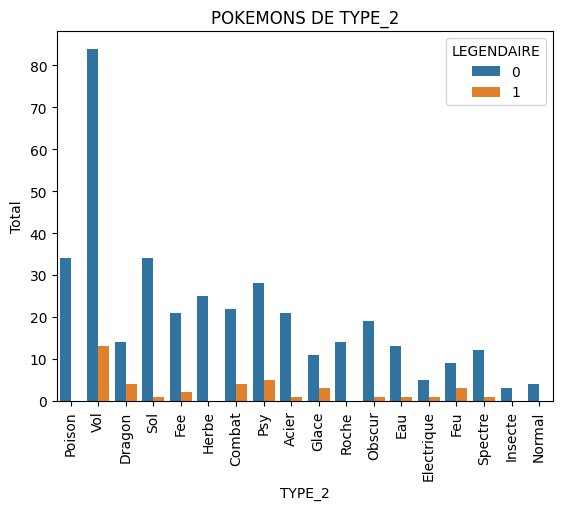

In [63]:
axe_x = sns.countplot(x="TYPE_2", hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel("TYPE_2")
plt.ylabel("Total")
plt.title("POKEMONS DE TYPE_2")
plt.show()


## 3. Types associés à des Pokémon gagnants

Nous calculons maintenant le pourcentage moyen de victoires pour chaque type
(`TYPE_1`). Cela permet d’identifier quels types gagnent le plus souvent en moyenne.
Les résultats sont triés du moins performant au plus performant.


In [64]:
types_gagnants = (
    nouveauPokedex
        .groupby("TYPE_1")
        .agg({"POURCENTAGE_DE_VICTOIRES": "mean"})
        .sort_values(by="POURCENTAGE_DE_VICTOIRES")
)

print(types_gagnants)


            POURCENTAGE_DE_VICTOIRES
TYPE_1                              
Fee                         0.329300
E                           0.343750
Roche                       0.404852
Acier                       0.424529
Poison                      0.433262
Insecte                     0.439006
Glace                       0.439604
Herbe                       0.440364
Eau                         0.470520
Combat                      0.475616
Spectre                     0.484027
Normal                      0.535578
Sol                         0.541526
Psy                         0.545747
Feu                         0.579215
Obscur                      0.629726
Electrique                  0.632861
Dragon                      0.633587
Vol                         0.765061


## 4. Corrélation entre les caractéristiques

Nous examinons la corrélation entre différentes caractéristiques numériques :

- Points de vie
- Attaque
- Défense
- Attaque spéciale
- Défense spéciale
- Vitesse
- Statut légendaire
- Pourcentage de victoires

La matrice de corrélation permet d’identifier quelles caractéristiques sont liées
entre elles ou corrélées à la performance en combat.


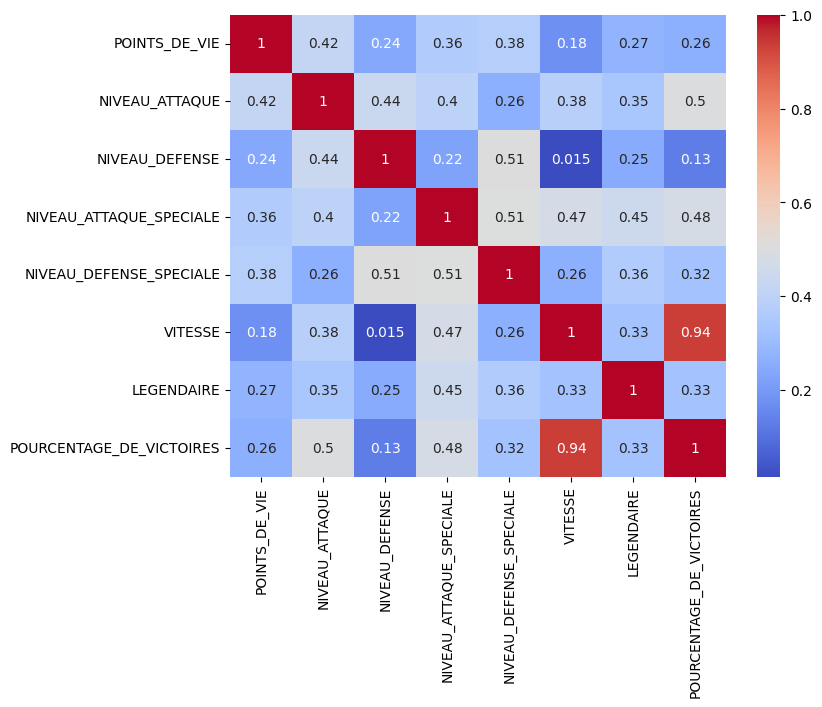

In [65]:
colonnes_corr = [
    "POINTS_DE_VIE",
    "NIVEAU_ATTAQUE",
    "NIVEAU_DEFENSE",
    "NIVEAU_ATTAQUE_SPECIALE",
    "NIVEAU_DEFENSE_SPECIALE",
    "VITESSE",
    "LEGENDAIRE",
    "POURCENTAGE_DE_VICTOIRES",
]

corr = nouveauPokedex.loc[:, colonnes_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    annot=True,
    cmap="coolwarm"
)
plt.show()


## 5. Sauvegarde du dataset final

Nous sauvegardons maintenant l’ensemble des données enrichies dans un fichier
`dataset.csv`. Ce fichier sera utilisé dans la Partie 3 pour entraîner les modèles
de prédiction.


In [66]:
dataset = nouveauPokedex
dataset.to_csv("datas/dataset.csv", sep="\t")
